# CHEM 1000 - Fall 2020
Prof. Geoffrey Hutchison, University of Pittsburgh

## 2. Functions and Coordinate Sets

### 2.a Functions

As a reminder, a function maps numbers (e.g., 'x' values) to other numbers (e.g., 'y' values):

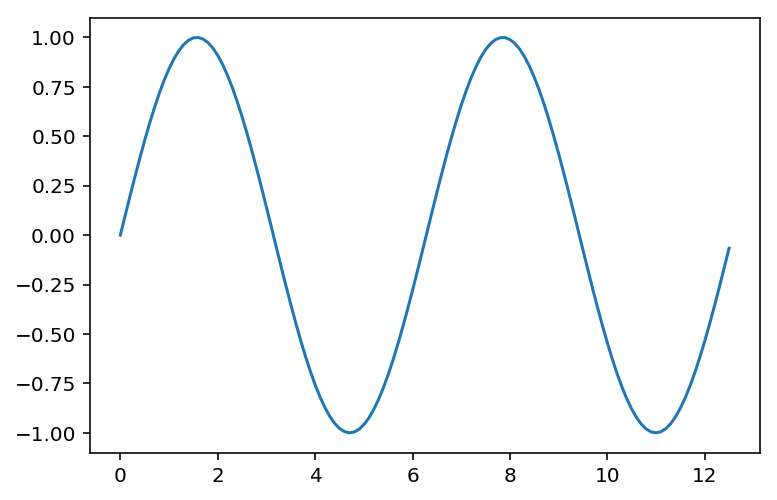

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# insert any graphs into our notebooks directly
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

x = np.arange(0, 4*np.pi, 0.1)   # start, stop, resolution
y = np.sin(x)

plt.plot(x,y)
plt.show()

**Nice !** We have a pretty easy way to plot functions in our Jupyter notebooks - we can learn to tweak the plots later (e.g., axes labels, etc.), but this is good enough for now.

We can plot multiple functions in one graph. We just use plt.plot(x, y) multiple times before calling plt.show()

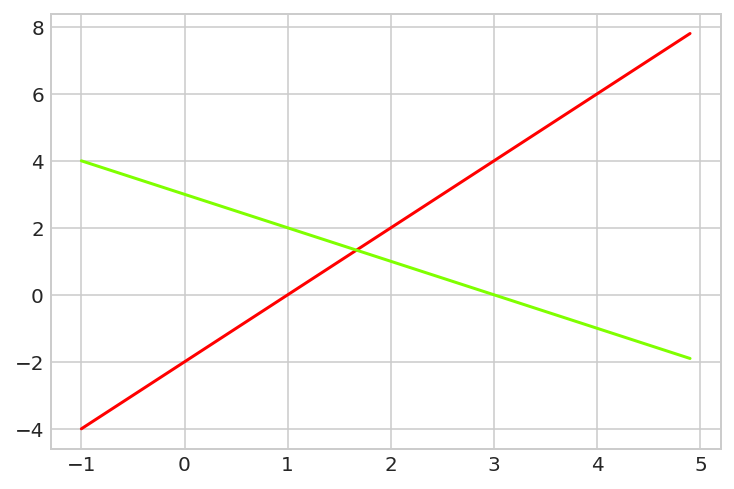

In [2]:
# add some grid lines
plt.style.use('seaborn-whitegrid')

x = np.arange(-1.0, 5.0, 0.1)
# There are defaults for the colors, but we'll specify them to be safe
plt.plot(x, 2*x - 2, color='red')
plt.plot(x, 3 - x, color='chartreuse') # any HTML color name is supported
plt.show()

As a reminder, the slope of the lines can be calculated, e.g. for the red line:
$$ slope = \frac{\Delta y}{\Delta x} = \frac{6 - 0}{4 - 1} = 2$$

#### Quadratic Functions

Quadratic equations take the form:
$$ y(x) = ax^2 + bx + c$$

For example:

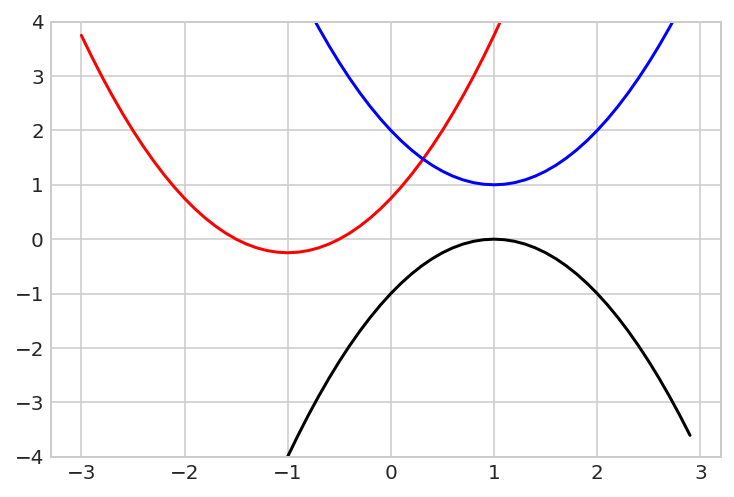

In [3]:
x = np.arange(-3.0, 3.0, 0.1)
plt.plot(x, -x**2 + 2*x - 1, color='black')
plt.plot(x, x**2 + 2*x + 0.75, color='red')
plt.plot(x, x**2 - 2*x + 2, color='blue')
plt.ylim(-4,4) # set the limit on the y-axis to -4 .. 4
plt.show()

You probably remember that we can solve quadratic equations:
$$ x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

The $\sqrt{b^2-4ac}$ part is important, since it tells us if we get real numbers for our solutions when $y(x) = 0$

### Chemical Equlibrium example:

Let's consider a chemistry example from the textbook:
$$\require{mhchem}$$
$$\ce{PCl5 (g) -> PCl3 (g) + Cl2 (g)}$$

So we can write an equilibrium constant:

$$K_P = \frac{P_{PCl_3}P_{Cl_2}}{P_{PCl_5}}$$

If we start with 1.0 atm pressure, then we get:

$$K_P = \frac{[x] \; [x]}{[1.0 - x]}$$

Then:

$$x^2 + K_P x − K_p = 0$$

### Beyond Quadratics

Obviously, there are higher-order polynomial functions. We usually note the type or category of the polynomial by the highest-order exponent:

- $x$ - linear
- $x^2$ - quadratic
- $x^3$ - cubic
- $x^4$ - quartic
- $x^5$ - quintic

There are analytical ways to solve linear, quadratic, cubic, and quartic functions. It's been proven that [quintic](https://en.wikipedia.org/wiki/Quintic_function) equations cannot always be solved.

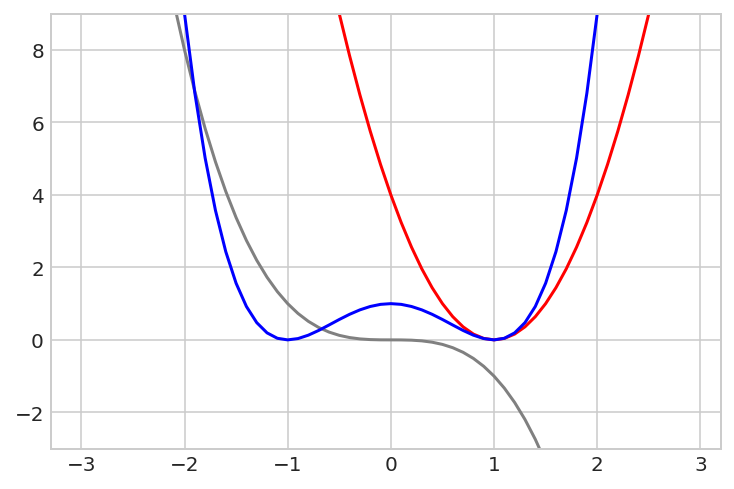

In [4]:
x = np.arange(-3.0, 3.0, 0.1)
plt.plot(x, 4*(x-1)**2, color='red')
plt.plot(x, -x**3, color='grey')
plt.plot(x, (x**2 - 1)**2, color='blue')
plt.ylim(-3, 9.0)
plt.show()

### Odd and Even Functions

Think about the function $y = -x^3$ above. For any value $x$, we can see that:
$$y(x) = -y(-x)$$

In other words, the function is inverted on opposite side of $x = 0$. This is an example of an *odd function*. In contrast, $y = (x^2 - 1)^2$ is an *even function* where $y(x) = y(-x)$. It has mirror symmetry around $x = 0$.

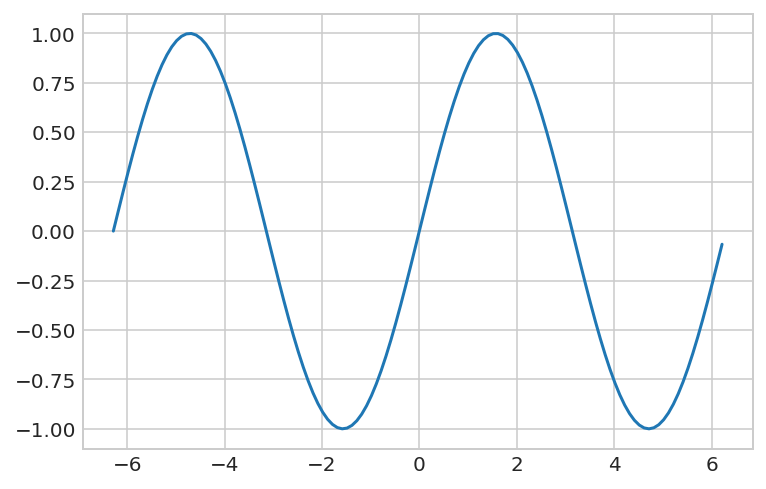

In [5]:
import math

x = np.arange(-2*math.pi, 2*math.pi, 0.1)
plt.plot(x, np.sin(x))
plt.show()

Is $sin(x)$ odd or even?

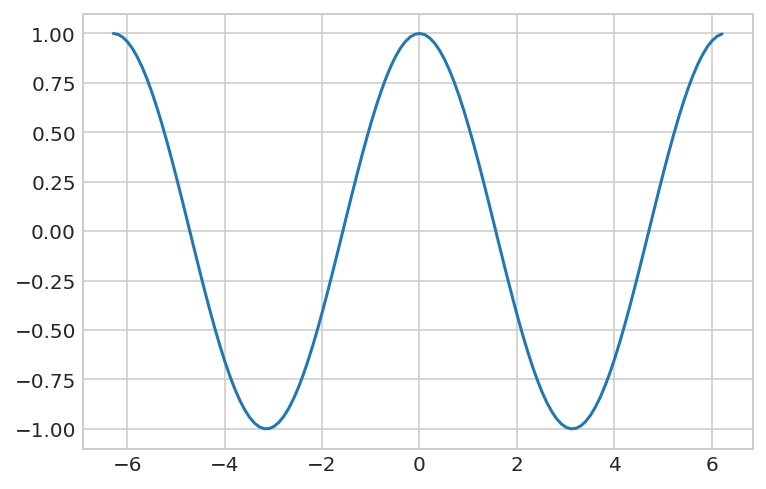

In [6]:
plt.plot(x, np.cos(x))
plt.show()

What about $cos(x)$?

Some functions are neither, for example $y = 4*(x-1)**2$ is not odd or even because it has *no* symmetry at all around $x = 0$.

### Plot the function

Lots of people / texts will tell you to draw the function. When I took math courses, they spent a lot of time on sketching functions. It's 2020, and I carry a powerful computer in my pocket (i.e., my iPhone).

To borrow from an ad campaign, and one of my favorite college professors, here's **Hutchison's First Law**:

## Just Plot It!

This will tell you things like maximum or minimum values, whether it's continuous, how it behaves (e.g., is it only defined on a range of values), etc. Hopefully if you're not comfortable plotting functions in Python, you will be soon.

### Useful functions:

**Exponentials.**

In many cases, growth can be much faster than linear, quadratic, etc. (e.g. COVID):
$$y = e^x$$

In [ ]:
math.e

There's also exponential decay (e.g, radioactive elements):
$$y = e^{-x}$$

In [ ]:
x = np.arange(-3.0, 3.0, 0.1)
plt.plot(x, np.exp(x))
plt.plot(x, np.exp(-x))
plt.ylim(0, 12.0)
plt.show()

Note that $e^{2.3} \approx 10$. We can find the exact value with the $log()$ function, which is the inverse of exponentials.

In [ ]:
math.log(10)

## Polar (2D) Coordinates

## Spherical Coordinates

The code below might look a little complicated. That's okay. I've added comments for the different sections and each line.

In [ ]:
# import some matplotlib modules for 3D and color scales
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors
cmap = plt.get_cmap('jet') # pick a red-to-blue color map
fig = plt.figure() # create a figure
ax = fig.add_subplot(1,1,1, projection='3d') # set up some axes for a 3D projection

# We now set up the grid for evaluating our function
#  particularly the angle portion of the spherical coordinates
theta = np.arange(0, 2*np.pi, 0.1)
phi = np.arange(0, np.pi, 0.1)
THETA, PHI = np.meshgrid(theta, phi)

# here's the function to plot
R = np.abs(np.cos(PHI**2))

# now convert R(phi, theta) to x, y, z coordinates to plot
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)

# set up some colors based on the Z range .. from red to blue
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
# plot the surface
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, 
    facecolors=cmap(norm(Z)),
    linewidth=0, antialiased=True, alpha=0.5) # no lines, smooth graphics, semi-transparent
plt.show()

-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>